In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1, 50], [5, 20], [3, 80], [5,60]]).astype(np.float64)
y = np.array([0,0,1,1])

In [3]:
from sklearn.svm import SVC
svc_clf = SVC(C = 10, kernel='linear')

In [4]:
svc_clf.fit(x,y)

SVC(C=10, kernel='linear')

In [22]:
svc_clf.intercept_,svc_clf.coef_,

# w = svc_clf.coef_[0]
# b = svc_clf.intercept_[0]
# at decision boundry x0*w0 + w1*x1 + b = 0
# x1 = -b/w1 -x0*w0/w1



(array([-9.68965517]), array([[0.06896552, 0.17241379]]))

In [59]:
def plot_svc_decision_boundry(svc_clf, xmin, xmax):
    w = svc_clf.coef_[0]
    b = svc_clf.intercept_[0]

    x0 = np.linspace(xmin,xmax,200)
    decision_boundry = -w[0]/w[1]*x0 - b/w[1]
    margin = 1/w[1]

    gutter_up = decision_boundry + margin
    gutter_down = decision_boundry - margin

    svs = svc_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1], s =180)
    plt.plot(x0, decision_boundry,'k-', lw = 2)
    plt.plot(x0, gutter_up,'k--')
    plt.plot(x0, gutter_down, 'k--')


In [60]:
decision_function = svc_clf.decision_function(x)
decision_function

array([-1.        , -5.89655172,  4.31034483,  1.        ])

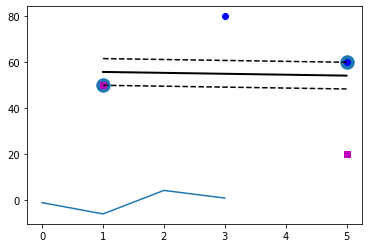

In [61]:
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bo")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "ms")
plot_svc_decision_boundry(svc_clf,1,5 )
plt.plot(decision_function)
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)

In [64]:
x_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [65]:
svc_clf.fit(x_scaled,y)

SVC(C=10, kernel='linear')

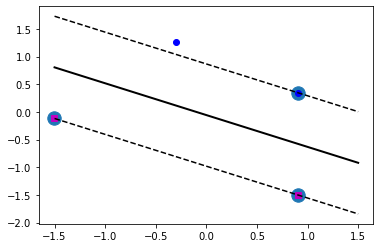

In [68]:
plt.plot(x_scaled[:, 0][y==1], x_scaled[:, 1][y==1], "bo")
plt.plot(x_scaled[:, 0][y==0], x_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundry(svc_clf,-1.5,1.5)
#plt.plot(decision_function)
plt.show()